In [57]:
import numpy as np
import pandas as pd
import plotly.express as px 
import matplotlib.pyplot as plt
import seaborn as sns
import time
import requests
import datetime as dt
import plotly.graph_objects as go
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## Phân tích Tổng quan các kênh

In [16]:
df = pd.read_csv('./data_scrape.csv')
dfsub = pd.read_csv('./channel_stats.csv')

### Năm bắt đầu hoạt động của các kênh

In [17]:
df['Ngày phát hành'] = pd.to_datetime(df['Ngày phát hành'], errors='coerce')
channel_start_year = df.groupby('Tên kênh')['Ngày phát hành'].min().dt.year
channel_start_year = channel_start_year.sort_values().reset_index(name='Năm thành lập')
channel_start_year

Tên kênh  Năm thành lập
0               Vũ Cát Tường           2012
1                       Wowy           2012
2            Chi Pu Official           2013
3            Hoàng Thùy Linh           2013
4                  Trúc Nhân           2013
5   Phan Mạnh Quỳnh Official           2013
6                     My Tam           2013
7              JustaTeeMusic           2013
8                Vũ Official           2013
9                  Hòa Minzy           2014
10             Phương Mỹ Chi           2014
11           Noo Phước Thịnh           2014
12               BÍCH PHƯƠNG           2014
13    Sơn Tùng M-TP Official           2015
14          Đen Vâu Official           2015
15              MIN OFFICIAL           2015
16    Hương Tràm Charmy pham           2016
17             ERIK Official           2017
18                     tlinh           2018
19               MCK // Nger           2018
20                      AMEE           2020
21            Pháo Northside           2020
22                HIEUTHUHAI           2020
23                       J97           2020
24                  ĐÔNG NHI           2020
25               Dương Domic           2022
26             Mono Official           2022

### Năm có tổng View nhiều nhất của các kênh

In [20]:
df['Năm phát hành'] = df['Ngày phát hành'].dt.year

# Tính tổng số lượt xem của mỗi kênh theo năm
views_per_year_channel = df.groupby(['Tên kênh', 'Năm phát hành'])['Số lượt xem'].sum().reset_index()

# Tìm năm có nhiều lượt xem nhất cho mỗi kênh
max_views_per_channel = views_per_year_channel.loc[
    views_per_year_channel.groupby('Tên kênh')['Số lượt xem'].idxmax()
]
max_views_per_channel.rename(columns={'Năm phát hành': 'Năm View cao'}, inplace=True)
# Ghép thông tin ngày thành lập vào dữ liệu
max_views_per_channel = max_views_per_channel.merge(channel_start_year, on='Tên kênh')
max_views_per_channel_sorted = max_views_per_channel.sort_values(by='Năm thành lập')

max_views_per_channel_sorted

Tên kênh  Năm View cao  Số lượt xem  Năm thành lập
21              Vũ Cát Tường          2024     55693014           2012
23                      Wowy          2020    152959616           2012
2            Chi Pu Official          2019    177756751           2013
6            Hoàng Thùy Linh          2019    262250568           2013
20                 Trúc Nhân          2019    399974504           2013
16  Phan Mạnh Quỳnh Official          2017    142980506           2013
14                    My Tam          2017    343220389           2013
10             JustaTeeMusic          2018    270289557           2013
22               Vũ Official          2016    210181479           2013
7                  Hòa Minzy          2018    208797475           2014
18             Phương Mỹ Chi          2023     80742683           2014
15           Noo Phước Thịnh          2014    136804110           2014
1                BÍCH PHƯƠNG          2018    406031673           2014
19    Sơn Tùng M-TP Official          2016    651629076           2015
25          Đen Vâu Official          2019    624612149           2015
12              MIN OFFICIAL          2017    372584201           2015
8     Hương Tràm Charmy pham          2017    240070315           2016
4              ERIK Official          2018    323098998           2017
24                     tlinh          2023    165681701           2018
11               MCK // Nger          2023    192182244           2018
0                       AMEE          2020     12803274           2020
17            Pháo Northside          2023     58747252           2020
5                 HIEUTHUHAI          2023    192755961           2020
9                        J97          2020    647923648           2020
26                  ĐÔNG NHI          2020     12065447           2020
3                Dương Domic          2024     30809449           2022
13             Mono Official          2022    163913127           2022

In [21]:
fig = px.bar(
    max_views_per_channel_sorted,
    x='Tên kênh',  # Tên kênh
    y='Số lượt xem',  # Lượt xem cao nhất
    color='Tên kênh', 
    title="So sánh số View của năm có tổng View cao nhất của các kênh",
    labels={'Tên kênh': 'Tên kênh', 'Số lượt xem': 'Lượt xem cao nhất'},
    color_discrete_sequence=px.colors.qualitative.Set1, 
    height=600,
    width=1000
)

fig.update_traces(marker_line_width=1.5, textposition='outside') 
fig.update_layout(xaxis_tickangle=-45)

# Hiển thị biểu đồ
fig.show()

### Tổng video đã phát hành của mỗi kênh trong năm 2024

In [23]:
df_2024 = df[df['Năm phát hành'] == 2024]

# Tính tổng số video đã phát hành trong năm 2024 của mỗi kênh
total_videos_2024_per_channel = df_2024.groupby('Tên kênh').size().reset_index(name='Tổng số video')

fig = px.bar(
    total_videos_2024_per_channel,
    x='Tên kênh',
    y='Tổng số video',
    title="Tổng số video đã phát hành của mỗi kênh trong năm 2024",
    labels={'Tên kênh': 'Tên kênh', 'Tổng số video': 'Tổng số video'},
    color='Tổng số video',  # Màu sắc theo số lượng video
    height=600,
    width=1000
)

fig.update_layout(xaxis_tickangle=-45) 

fig.show()

### Tổng lượt xem của mỗi kênh trong năm 2024

In [24]:
# Tính tổng số lượt xem của mỗi kênh trong năm 2024
total_views_2024_per_channel = df_2024.groupby('Tên kênh')['Số lượt xem'].sum().reset_index()

fig = px.bar(
    total_views_2024_per_channel,
    x='Tên kênh',
    y='Số lượt xem',
    title="Tổng số lượt xem của mỗi kênh trong năm 2024",
    labels={'Tên kênh': 'Tên kênh', 'Số lượt xem': 'Tổng số lượt xem'},
    color='Số lượt xem',  
    height=600,
    width=1000
)

fig.update_layout(xaxis_tickangle=-45)  

fig.show()

### Kênh phát hành nhiều Video nhất ở mỗi năm

In [27]:
# Nhóm dữ liệu theo 'Năm phát hành' và 'Tên kênh', sau đó tính số lượng video mỗi kênh trong từng năm
videos_per_year_channel = df.groupby(['Năm phát hành', 'Tên kênh']).size().reset_index(name='Số video')
videos_per_year_channel.rename(columns={'Năm phát hành': 'Năm'}, inplace=True)

# Tìm kênh đăng tải nhiều video nhất mỗi năm
top_uploaders_per_year = videos_per_year_channel.loc[videos_per_year_channel.groupby('Năm')['Số video'].idxmax()]
# In kết quả
top_uploaders_per_year[['Năm', 'Tên kênh', 'Số video']]


Năm                Tên kênh  Số video
1    2012                    Wowy        16
5    2013                  My Tam       101
16   2014                  My Tam       106
23   2015             BÍCH PHƯƠNG        27
45   2016         Noo Phước Thịnh        48
62   2017         Noo Phước Thịnh        43
75   2018  Hương Tràm Charmy pham        42
99   2019                  My Tam        69
126  2020           Phương Mỹ Chi        47
136  2021             BÍCH PHƯƠNG        46
162  2022         Chi Pu Official        37
209  2023                   tlinh        56
220  2024  Hương Tràm Charmy pham       163

### Kênh có tổng view nhiều nhất mỗi năm

In [30]:
views_per_year_channel = df.groupby(['Năm phát hành', 'Tên kênh'])['Số lượt xem'].sum().reset_index(name='Tổng lượt xem')
views_per_year_channel.rename(columns={'Năm phát hành': 'Năm'}, inplace=True)

# Tìm kênh có tổng lượt xem cao nhất mỗi năm
top_views_per_year = views_per_year_channel.loc[views_per_year_channel.groupby('Năm')['Tổng lượt xem'].idxmax()]

top_views_per_year[['Năm', 'Tên kênh', 'Tổng lượt xem']]

Năm                Tên kênh  Tổng lượt xem
1    2012                    Wowy      123875268
5    2013                  My Tam      295230100
19   2014               Trúc Nhân      155063783
32   2015  Sơn Tùng M-TP Official      381580454
47   2016  Sơn Tùng M-TP Official      651629076
65   2017  Sơn Tùng M-TP Official      413071057
70   2018             BÍCH PHƯƠNG      406031673
109  2019        Đen Vâu Official      624612149
118  2020                     J97      647923648
152  2021  Sơn Tùng M-TP Official      274203857
166  2022         Hoàng Thùy Linh      207271680
190  2023              HIEUTHUHAI      192755961
231  2024  Sơn Tùng M-TP Official      217705677

### Tương quan Tổng lượt xem và Tổng video đăng tải

In [32]:
#Tính tổng số video theo từng kênh
videos_per_channel = df.groupby('Tên kênh').size().reset_index(name='Số lượng video')

# Tính tổng số lượt xem theo từng kênh
views_per_channel = df.groupby('Tên kênh')['Số lượt xem'].sum().reset_index()

merged_df = pd.merge(videos_per_channel, views_per_channel, on='Tên kênh')
correlation = merged_df['Số lượng video'].corr(merged_df['Số lượt xem'])

fig = px.scatter(merged_df, x='Số lượng video', y='Số lượt xem',
                 title=f'Tương quan giữa số lượng video và số lượt xem theo từng kênh (Corr = {correlation:.2f})',
                 labels={'Số lượng video': 'Số lượng video', 'Số lượt xem': 'Số lượt xem'},
                 hover_name='Tên kênh',
                 trendline='ols')
fig.show()

### Tương quan Tổng video và Lượt đăng ký

In [33]:
merged_data = pd.merge(videos_per_channel, dfsub[['Tên kênh', 'Số lượt đăng ký']], on='Tên kênh')
correlation = merged_data['Số lượt đăng ký'].corr(merged_data['Số lượng video'])

fig = px.scatter(merged_data, x='Số lượng video', y='Số lượt đăng ký',
                 title=f'Tương quan giữa số lượng video và số lượng subscriber của kênh (Corr = {correlation:.2f})',
                 labels={'Số lượng video': 'Số lượng video', 'Số lượt đăng ký': 'Số lượng subscriber'},
                 hover_name='Tên kênh',
                 trendline='ols') 
fig.show()

### Tương quan Lượt đăng ký và Tổng lượt xem

In [34]:
merged_data = pd.merge(views_per_channel, dfsub[['Tên kênh', 'Số lượt đăng ký']], on='Tên kênh')
correlation = merged_data['Số lượt đăng ký'].corr(merged_data['Số lượt xem'])

fig = px.scatter(merged_data, x='Số lượt đăng ký', y='Số lượt xem',
                 title=f'Tương quan giữa số lượng subscriber và số lượt xem của kênh (Corr = {correlation:.2f})',
                 labels={'Số lượt đăng ký': 'Số lượng subscriber', 'Số lượt xem': 'Số lượt xem'},
                 hover_name='Tên kênh',
                 trendline="ols")

fig.show()


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Phân tích hiệu suất Video

### Top 10 video có số lượt xem cao nhất

In [35]:
top_10_highest_views = df.sort_values(by='Số lượt xem', ascending=False)
top_10_highest_views.head(10)

Tên kênh  Số lượt thích  Số lượt xem  Số bình luận  \
1743  Sơn Tùng M-TP Official      2159958.0    378758344      294610.0   
1719  Sơn Tùng M-TP Official      4149521.0    290744295     1252675.0   
1750  Sơn Tùng M-TP Official      1841510.0    273485839      295452.0   
205            JustaTeeMusic       998772.0    268759381       45499.0   
836              BÍCH PHƯƠNG       528945.0    242842448       21695.0   
1758  Sơn Tùng M-TP Official      1239796.0    225411688      208668.0   
3664                     J97      2716788.0    219268860     1998122.0   
1693  Sơn Tùng M-TP Official      2620299.0    213655420     2029058.0   
214            JustaTeeMusic       655761.0    196286348       29544.0   
2726        Đen Vâu Official      1101551.0    191875137       36165.0   

                                                Tiêu đề  Thời lượng video  \
1743  NƠI NÀY CÓ ANH | OFFICIAL MUSIC VIDEO | SƠN TÙ...             279.0   
1719  SƠN TÙNG M-TP | HÃY TRAO CHO ANH ft. Snoop Dog...             263.0   
1750    LẠC TRÔI | OFFICIAL MUSIC VIDEO | SƠN TÙNG M-TP             273.0   
205     THẰNG ĐIÊN | JUSTATEE x PHƯƠNG LY | OFFICIAL MV             287.0   
836   BÍCH PHƯƠNG x MIRINDA - Chuyện Cũ Bỏ Qua (Offi...             211.0   
1758  Chúng Ta Không Thuộc Về Nhau | Official Music ...             243.0   
3664        Jack | Hoa Hải Đường | Official Music Video             253.0   
1693  SƠN TÙNG M-TP | MUỘN RỒI MÀ SAO CÒN | OFFICIAL...             289.0   
214         JustaTee - Đã Lỡ Yêu Em Nhiều (Official MV)             267.0   
2726             Đen ft. MIN - Bài Này Chill Phết (M/V)             274.0   

     Ngày phát hành                                                Tag  \
1743     2017-02-01  ['son tung', 'sơn tùng', 'sơn tùng 2016', 'm-t...   
1719     2019-07-01  ['son tung', 'sơn tùng', 'son tung mtp', 'sơn...   
1750     2016-12-01  ['son tung', 'sơn tùng', 'sơn tùng 2016', 'm-t...   
205      2018-10-01  ['thằng điên', 'thang dien', 'thằng điên mv', ...   
836      2018-12-01  ['bích phương', 'bich phuong', 'bich phuong of...   
1758     2016-08-01  ['Sơn Tùng MTP', 'MTP', 'M-TP', 'Sơn Tùng', 'c...   
3664     2020-09-01  ['J97', 'jack', 'đóm', 'phương tuấn', 'jack ph...   
1693     2021-04-01  ['muộn rồi mà sao còn', 'muon roi ma sao con',...   
214      2017-11-01  ['rapper việt', 'đã lỡ yêu em nhiều justatee',...   
2726     2019-05-01  ['den', 'den vau', 'đen', 'đen vâu', 'rap hip ...   

      Năm phát hành  
1743           2017  
1719           2019  
1750           2016  
205            2018  
836            2018  
1758           2016  
3664           2020  
1693           2021  
214            2017  
2726           2019

### Top 10 Video có số lượt xem thấp nhất

In [36]:
top_10_lowest_views = df.sort_values(by='Số lượt xem')
top_10_lowest_views.head(10)

Tên kênh  Số lượt thích  Số lượt xem  Số bình luận  \
559          Hoàng Thùy Linh           27.0          574           0.0   
561          Hoàng Thùy Linh           41.0          687           1.0   
3281  Hương Tràm Charmy pham           38.0          711           5.0   
3030  Hương Tràm Charmy pham           14.0          726           0.0   
562          Hoàng Thùy Linh           38.0          755           1.0   
564          Hoàng Thùy Linh           52.0          783           0.0   
3111  Hương Tràm Charmy pham           27.0          846           2.0   
3110  Hương Tràm Charmy pham           22.0          899           0.0   
3059  Hương Tràm Charmy pham           28.0          925           0.0   
3079  Hương Tràm Charmy pham           32.0          938           9.0   

                                                Tiêu đề  Thời lượng video  \
559   Một ngày nào hóa chiếc lá chênh vênh đầu cành....              56.0   
561          Em đây chẳng phải Thúy Kiều #hoangthuylinh              55.0   
3281  Hương Tràm | Love For This Moment #LFTM [ Offi...              30.0   
3030                                  I Always love you              43.0   
562   Mau mau lại đâyyyy, đừng để tui bắt được nhá #...              60.0   
564   Vì niềm vui cần thiết gì đâu phải bán mua #hoa...              36.0   
3111  YÊU NHAU CÒN BIẾT SỢ GÌ (KARAOKE TONE NỮ) - HƯ...             203.0   
3110  YÊU NHAU CÒN BIẾT SỢ GÌ (KARAOKE TONE NAM) - H...             203.0   
3059  Tháng năm không có anh, là những tháng năm vô ...              46.0   
3079  Bạn vừa nhận được một tin nhắn thoại từ Charmy...              23.0   

     Ngày phát hành                                                Tag  \
559      2024-11-01  ['hoang thuy linh', 'hoàng thuỳ linh', 'banh t...   
561      2024-11-01  ['hoang thuy linh', 'hoàng thuỳ linh', 'banh t...   
3281     2018-11-01  ['Love For This Moment', '#DML', 'duyen minh l...   
3030     2024-11-01                                                NaN   
562      2024-11-01  ['hoang thuy linh', 'hoàng thuỳ linh', 'banh t...   
564      2024-11-01  ['hoang thuy linh', 'hoàng thuỳ linh', 'banh t...   
3111     2024-07-01  ['#DML', 'duyen minh lo', 'hương tràm', 'huong...   
3110     2024-07-01  ['#DML', 'duyen minh lo', 'hương tràm', 'huong...   
3059     2024-10-01                                                NaN   
3079     2024-08-01  ['hương tràm', 'hương tràm live', 'ca sĩ hương...   

      Năm phát hành  
559            2024  
561            2024  
3281           2018  
3030           2024  
562            2024  
564            2024  
3111           2024  
3110           2024  
3059           2024  
3079           2024

### Số lượt xem vs. Số lượt thích & Số bình luận

In [37]:
# Tính hệ số tương quan giữa Số lượt xem và Số lượt thích
correlation_likes = df['Số lượt xem'].corr(df['Số lượt thích'])

# Tính hệ số tương quan giữa Số lượt xem và Số bình luận
correlation_comments = df['Số lượt xem'].corr(df['Số bình luận'])

# Biểu đồ scatter giữa Số lượt xem và Số lượt thích
fig1 = px.scatter(df, x='Số lượt xem', y='Số lượt thích', title=f'Tương quan giữa Số lượt xem và Số lượt thích (Corr = {correlation_likes:.2f})',
                  hover_data=['Tiêu đề'], trendline="ols")

# Biểu đồ scatter giữa Số lượt xem và Số bình luận
fig2 = px.scatter(df, x='Số lượt xem', y='Số bình luận', title=f'Tương quan giữa Số lượt xem và Số bình luận (Corr = {correlation_comments:.2f})',
                  hover_data=['Tiêu đề'], trendline="ols")

fig1.show()
fig2.show()

### Trực quan lượng Views mỗi Video của các kênh

In [ ]:
# Biểu đồ Box Plot để phân tích số lượt xem của các video theo từng kênh
fig = px.box(df, x='Tên kênh', y='Số lượt xem', title='Phân phối số lượt xem của video theo kênh',
             labels={'Số lượt xem': 'Views', 'Tên kênh': 'Channel'},
             points="all")

fig.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## Phân tích xu hướng thời gian hoạt động của các kênh

### Thời điểm được lựa chọn đăng tải Video

In [39]:
df['Thứ'] = df['Ngày phát hành'].dt.day_name()
video_per_day_of_week = df.groupby('Thứ').size()
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
video_per_day_of_week = video_per_day_of_week.reindex(weekdays)
video_per_day_of_week

Thứ
Monday       628
Tuesday      547
Wednesday    642
Thursday     474
Friday       807
Saturday     555
Sunday       617
dtype: int64

In [ ]:
fig = px.bar(video_per_day_of_week, 
             x=video_per_day_of_week.index,
             y=video_per_day_of_week.values, 
             title="Số lượng video phát hành theo ngày trong tuần", 
             labels={'x': 'Ngày trong tuần', 'y': 'Số video'},  
             color=video_per_day_of_week.values,
             color_continuous_scale='RdBu')

fig.show()

In [42]:
# Tính số lượng video theo từng thứ trong tuần cho mỗi kênh
video_per_channel_day = df.groupby(['Tên kênh', 'Thứ']).size().reset_index(name='Số lượng video')

# Tìm ngày có số lượng video nhiều nhất cho mỗi kênh
max_video_per_channel = video_per_channel_day.loc[
    video_per_channel_day.groupby('Tên kênh')['Số lượng video'].idxmax()
]

total_video_per_channel = df.groupby('Tên kênh').size().reset_index(name='Tổng số video')
result = pd.merge(max_video_per_channel, total_video_per_channel, on='Tên kênh')

result[['Tên kênh', 'Thứ', 'Số lượng video', 'Tổng số video']]


Tên kênh        Thứ  Số lượng video  Tổng số video
0                       AMEE    Tuesday               9             40
1                BÍCH PHƯƠNG     Friday              46            174
2            Chi Pu Official  Wednesday              66            328
3                Dương Domic     Friday              28             67
4              ERIK Official     Friday              37            155
5                 HIEUTHUHAI     Sunday              19             48
6            Hoàng Thùy Linh     Friday              62            184
7                  Hòa Minzy  Wednesday              28            147
8     Hương Tràm Charmy pham   Saturday              71            316
9                        J97    Tuesday              12             37
10             JustaTeeMusic     Friday              15             59
11               MCK // Nger  Wednesday              22             55
12              MIN OFFICIAL    Tuesday              35            146
13             Mono Official     Monday              21             88
14                    My Tam   Saturday              96            502
15           Noo Phước Thịnh   Saturday              43            208
16  Phan Mạnh Quỳnh Official     Friday              20             70
17            Pháo Northside     Friday              15             36
18             Phương Mỹ Chi     Friday              58            296
19    Sơn Tùng M-TP Official   Saturday              46            199
20                 Trúc Nhân     Sunday              25            110
21              Vũ Cát Tường     Sunday              70            245
22               Vũ Official     Friday              26            123
23                      Wowy     Monday              52            178
24                     tlinh     Sunday              30            137
25          Đen Vâu Official     Friday              31            137
26                  ĐÔNG NHI     Monday              46            185

In [43]:
heatmap_data = video_per_channel_day.pivot(index='Tên kênh', columns='Thứ', values='Số lượng video')
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data[weekdays]  

# Vẽ biểu đồ heatmap
fig = px.imshow(heatmap_data, 
                labels={'x': 'Ngày trong tuần', 'y': 'Tên kênh', 'color': 'Số lượng video'},
                title="Số lượng video đăng tải của các kênh theo ngày trong tuần",
                color_continuous_scale='Blues', 
                aspect='auto',
                height=800
)

fig.show()

### Trực quan tần suất đăng tải Video mỗi tháng của kênh My Tam (Lập kênh vào giai đoạn 2010-2015)

In [46]:
my_tam_df = df[df['Tên kênh'] == 'My Tam'].copy()
my_tam_df['Tháng'] = my_tam_df['Ngày phát hành'].dt.to_period('M').astype(str) 

# Đếm số video theo tháng
video_per_month = my_tam_df.groupby('Tháng').size().reset_index(name='Số lượng video')

fig = px.line(video_per_month, 
              x='Tháng', 
              y='Số lượng video',  
              title="Tần suất đăng tải Video của kênh My Tam theo tháng",  
              labels={'Tháng': 'Tháng', 'Số lượng video': 'Số video'}, 
              markers=True) 

fig.show()

### Trực quan tần suất đăng tải Video mỗi tháng của kênh Sơn Tùng M-TP Official (Lập kênh vào giai đoạn 2016-2020)

In [47]:
son_tung_df = df[df['Tên kênh'] == 'Sơn Tùng M-TP Official'].copy()
son_tung_df['Tháng'] = son_tung_df['Ngày phát hành'].dt.to_period('M').astype(str)

# Đếm số video theo tháng
video_per_month = son_tung_df.groupby('Tháng').size().reset_index(name='Số lượng video')

fig = px.line(video_per_month, 
              x='Tháng',
              y='Số lượng video',  
              title="tần suất đăng tải Video của kênh Sơn Tùng M-TP Official theo tháng", 
              labels={'Tháng': 'Tháng', 'Số lượng video': 'Số video'},  
              markers=True)

# Hiển thị biểu đồ
fig.show()

### Trực quan tần suất đăng tải Video mỗi tháng của kênh Mono Official (Lập kênh vào giai đoạn 2021-2024)

In [48]:
mono_df = df[df['Tên kênh'] == 'Mono Official'].copy()
mono_df['Tháng'] = mono_df['Ngày phát hành'].dt.to_period('M').astype(str)  

video_per_month = mono_df.groupby('Tháng').size().reset_index(name='Số lượng video')

fig = px.line(video_per_month, 
              x='Tháng',
              y='Số lượng video',  
              title="Số lượng video đăng tải của kênh Mono Official theo tháng",  
              labels={'Tháng': 'Tháng', 'Số lượng video': 'Số video'}, 
              markers=True) 

fig.show()

# Phân tích nội dung
### Phân tích độ dài video ảnh hưởng đến lượt xem

In [50]:
# Chia thời lượng video thành các khoảng 3 phút 
df['length_bin'] = pd.cut(df['Thời lượng video'], bins=np.arange(0, 1800, 180))

# Tính trung bình lượt views theo các nhóm thời lượng
mean_views = df.groupby('length_bin')['Số lượt xem'].mean().reset_index()

# Chuyển đổi nhãn của các khoảng thành dạng chuỗi
mean_views['length_bin'] = mean_views['length_bin'].astype(str)

# Vẽ biểu đồ đường 
fig = px.line(
    mean_views,
    x='length_bin',
    y='Số lượt xem',
    labels={'length_bin': 'Độ dài video (theo khoảng)', 'Số lượt xem': 'Lượt xem trung bình'},
    title='Mối quan hệ giữa Độ dài video và Lượt xem trung bình'
)

fig.update_traces(mode='lines+markers', marker=dict(size=8, color='blue'))
fig.update_layout(title_font_size=18, xaxis_tickangle=45, xaxis_title='Độ dài video (theo khoảng)', yaxis_title='Lượt xem trung bình')
fig.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_78460\887293766.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Phân tích độ dài video ảnh hưởng đến lượt tương tác

In [54]:
# Chia thời lượng video thành các khoảng 3 phút (180 giây)
df['length_bin'] = pd.cut(df['Thời lượng video'], bins=np.arange(0, 1800, 180))

# Tính trung bình lượt thích và lượt comment theo các nhóm thời lượng
mean_data = df.groupby('length_bin').agg({'Số lượt thích': 'mean','Số bình luận': 'mean'}).reset_index()

# Chuyển đổi nhãn của các khoảng thành dạng chuỗi
mean_data['length_bin'] = mean_data['length_bin'].astype(str)

# Tạo một biểu đồ với 2 trục y
fig = go.Figure()

# Đường cho lượt thích
fig.add_trace(go.Scatter(
    x=mean_data['length_bin'],
    y=mean_data['Số lượt thích'],
    mode='lines+markers',
    name='Lượt thích trung bình',
    marker=dict(size=8, color='green'),
    yaxis='y2'
))

# Đường cho lượt comment
fig.add_trace(go.Scatter(
    x=mean_data['length_bin'],
    y=mean_data['Số bình luận'],
    mode='lines+markers',
    name='Lượt bình luận trung bình',
    marker=dict(size=8, color='red'),
    yaxis='y2'
))

# Cập nhật layout để có 2 trục y
fig.update_layout(
    title='Mối quan hệ giữa Độ dài video, Lượt thích và Lượt bình luận',
    xaxis=dict(title='Độ dài video (theo khoảng)', tickangle=45),
    yaxis=dict(
        title='Lượt thích và Comment trung bình',
        side='right',
        titlefont=dict(color='green'),
        tickfont=dict(color='green')
    ),
    title_font_size=18
)

fig.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_78460\1495054880.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Mối liên hệ giữa độ dài tiêu đề và lượt xem

In [55]:
df['Độ dài tiêu đề'] = df['Tiêu đề'].apply(len)

# Tạo biểu đồ scatter plot
fig = px.scatter(
    df, x='Độ dài tiêu đề', y='Số lượt xem',
    title='Mối liên hệ giữa độ dài tiêu đề và lượt xem',
    labels={'Độ dài tiêu đề': 'Độ dài tiêu đề', 'Số lượt xem': 'Số lượt xem'},
    trendline='ols'
)

fig.show()

In [56]:
df['Nhóm độ dài tiêu đề'] = pd.cut(df['Độ dài tiêu đề'], bins=range(0, 101, 10), labels=[f"{i}-{i+10}" for i in range(0, 100, 10)])

# Tạo biểu đồ violin
fig = px.violin(df, x='Nhóm độ dài tiêu đề', y='Số lượt xem', box=True, points="all", 
                labels={'Nhóm độ dài tiêu đề': 'Độ dài tiêu đề', 'Số lượt xem': 'Số lượt xem'},
                title='Mối quan hệ giữa Độ dài Tiêu đề và Số lượt xem')

fig.show()

### Từ khóa tiêu đề và mô tả xuất hiện nhiều nhất trong các video qua 3 thời kỳ

In [58]:
# Thiếp lập stopwords trong tiếng Việt
vietnamese_stopwords = ['và', 'của', 'trong', 'với', 'để', 'vì', 'là', 'một', 'có', 'theo', 'của']
stop_words = set(vietnamese_stopwords)

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 


# Hàm lọc data dựa theo năm phát hành của video
def filter_df(start, end):
    df_filtered = df[(df['Ngày phát hành'] >= start) &
                 (df['Ngày phát hành'] <= end)]
    
    # Lọc stopwords khỏi tiêu đề
    df_filtered['title_no_stopwords'] = df_filtered['Tiêu đề'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

    # Tạo list gồm title đã lọc
    all_words = list([a for b in df_filtered['title_no_stopwords'].tolist() for a in b])
    all_words_str = ' '.join(all_words)

    # Tạo wordcloud & vẽ 
    wordcloud = WordCloud(width=2000, height=1000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(all_words_str)
    plot_cloud(wordcloud)


C:\Users\HP\AppData\Local\Temp\ipykernel_78460\1355678560.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



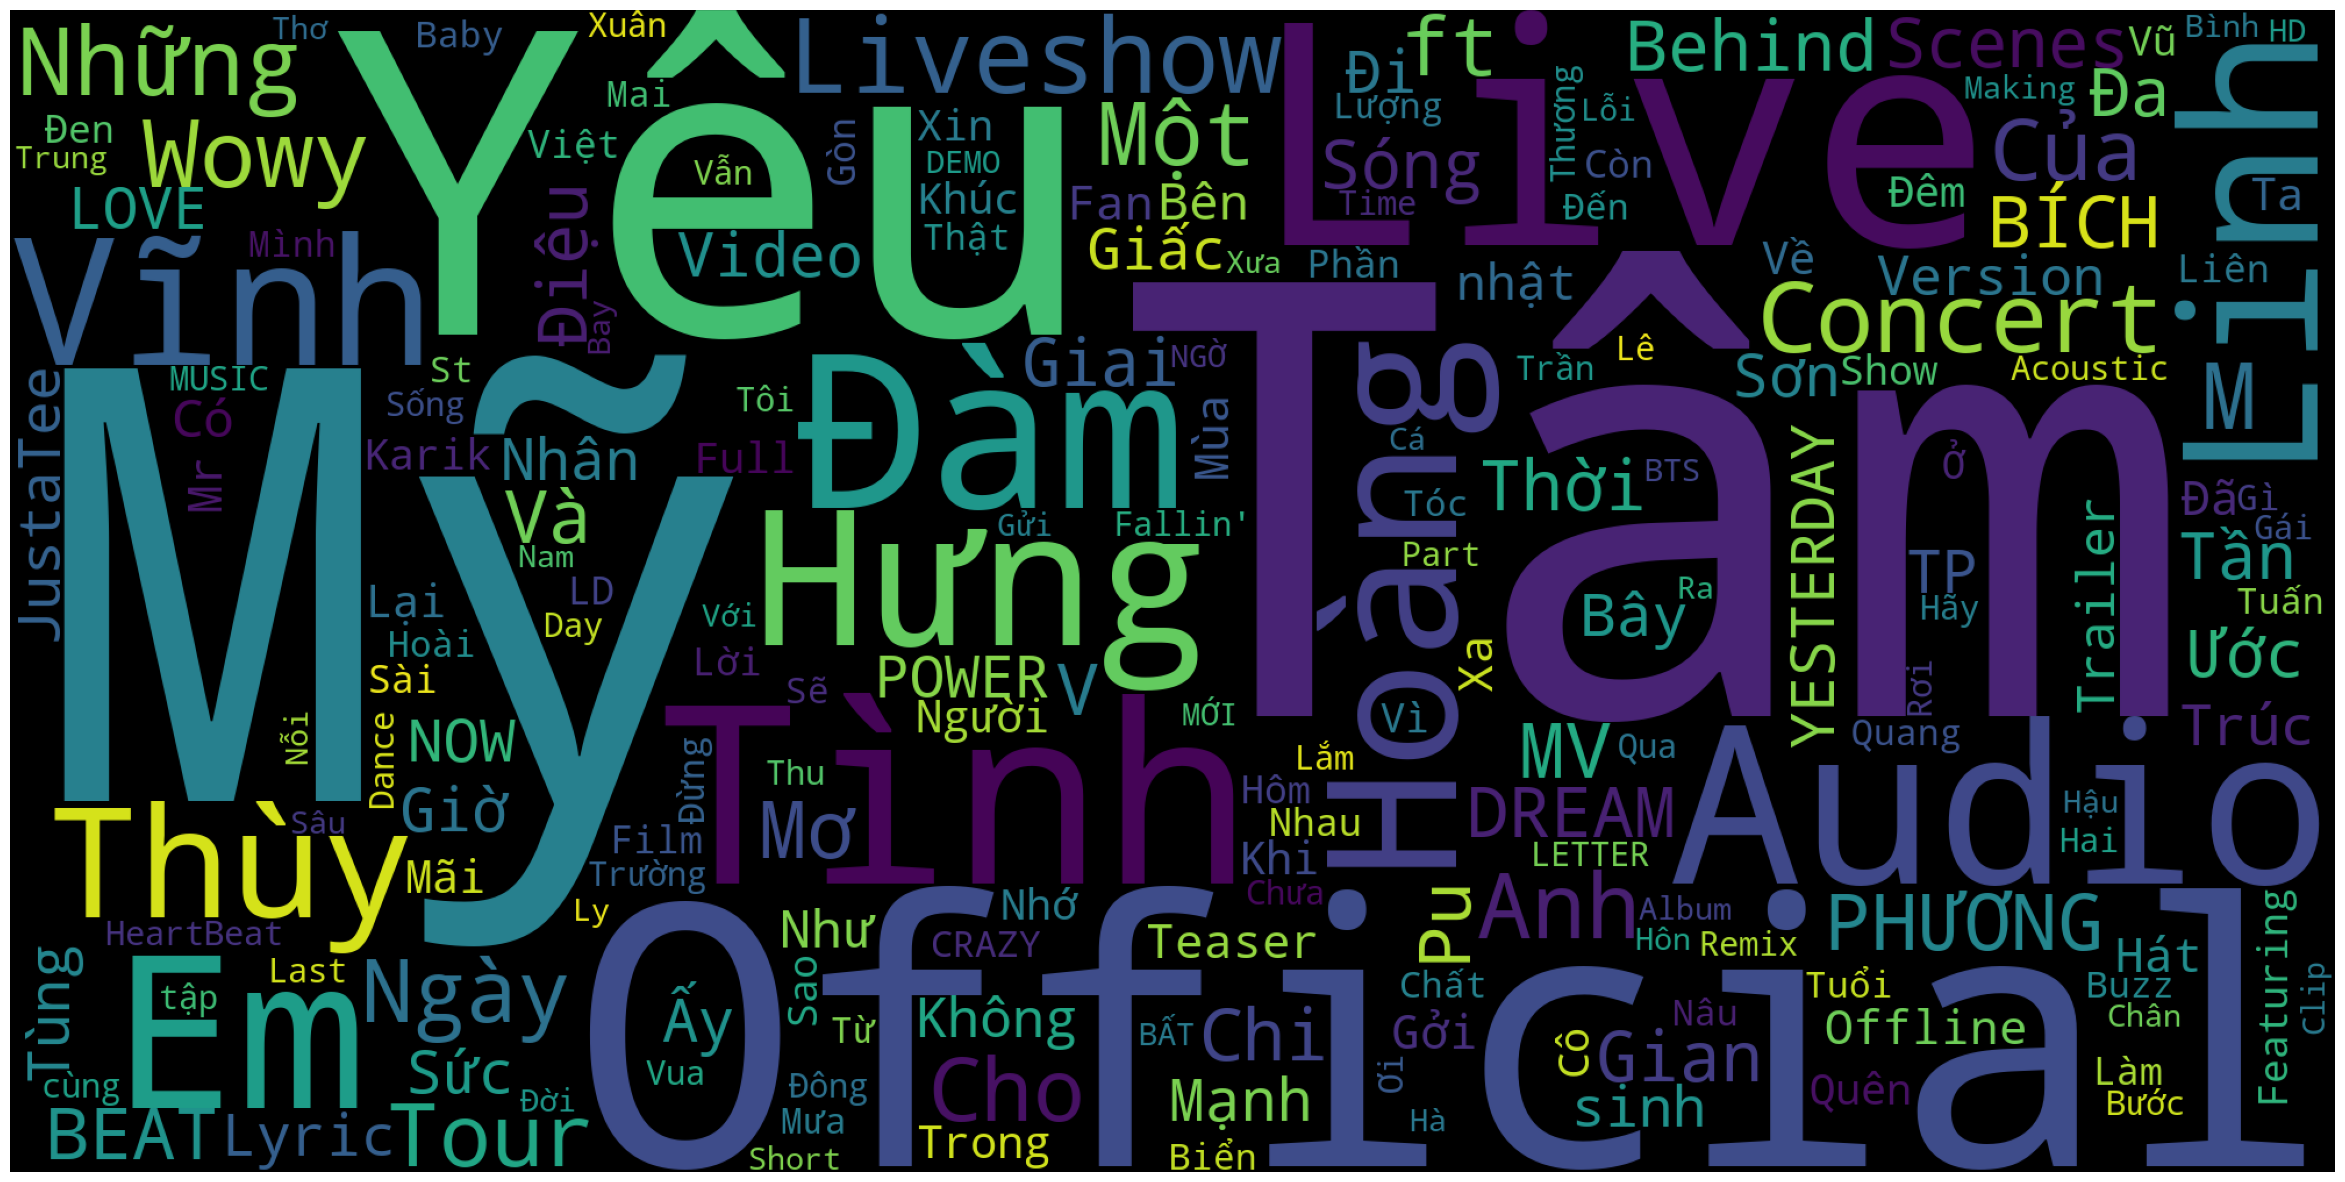

In [59]:
filter_df('2010-01-01','2015-12-31')

C:\Users\HP\AppData\Local\Temp\ipykernel_78460\1355678560.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



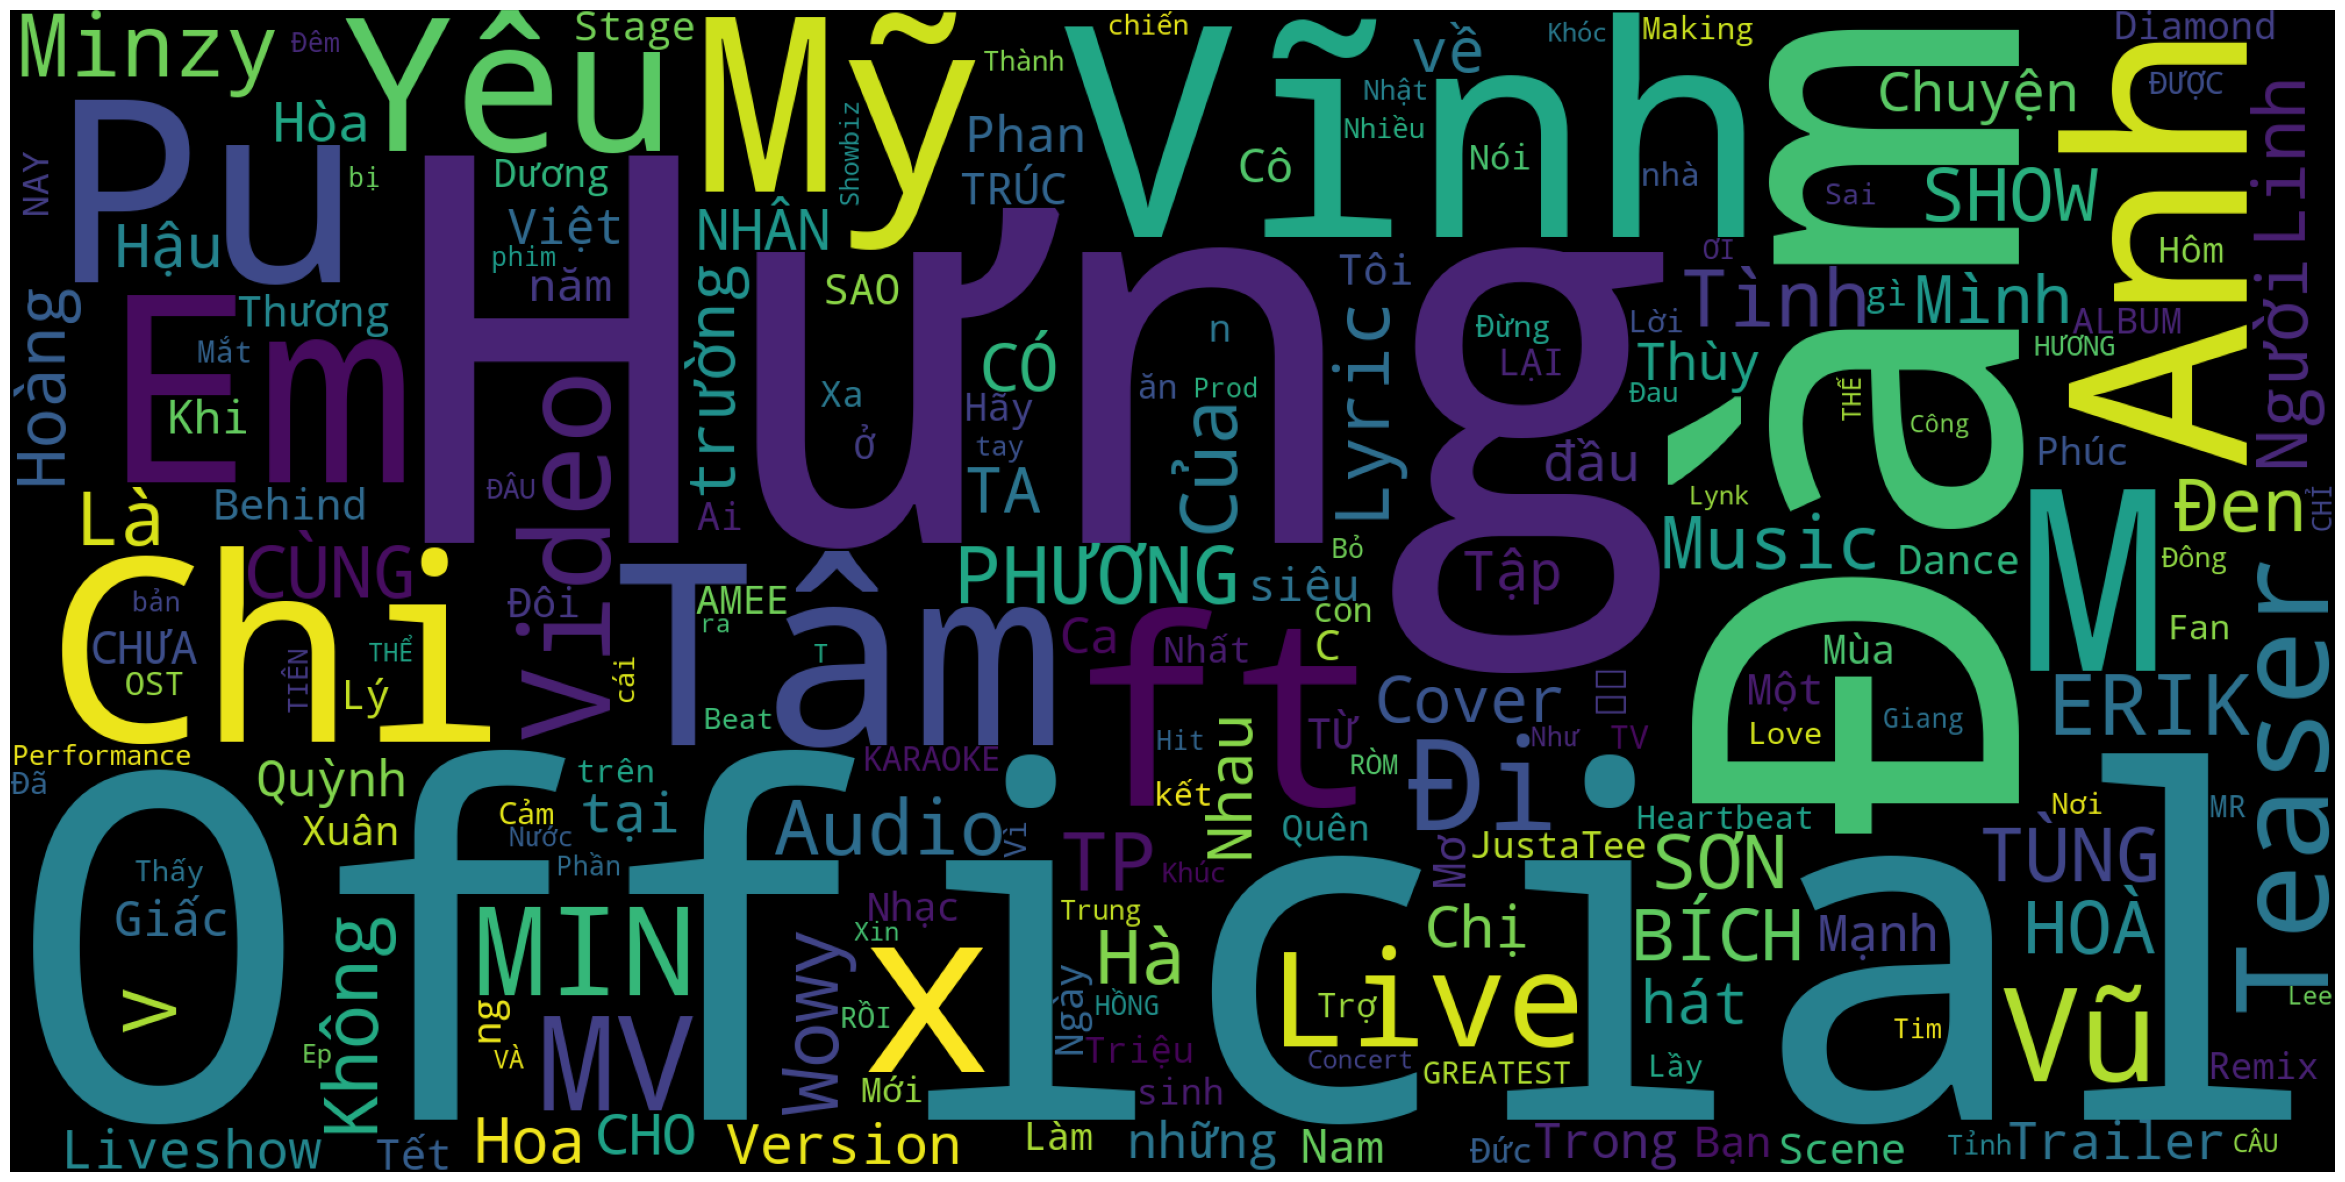

In [60]:
filter_df('2016-01-01','2020-12-31')

C:\Users\HP\AppData\Local\Temp\ipykernel_78460\1355678560.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



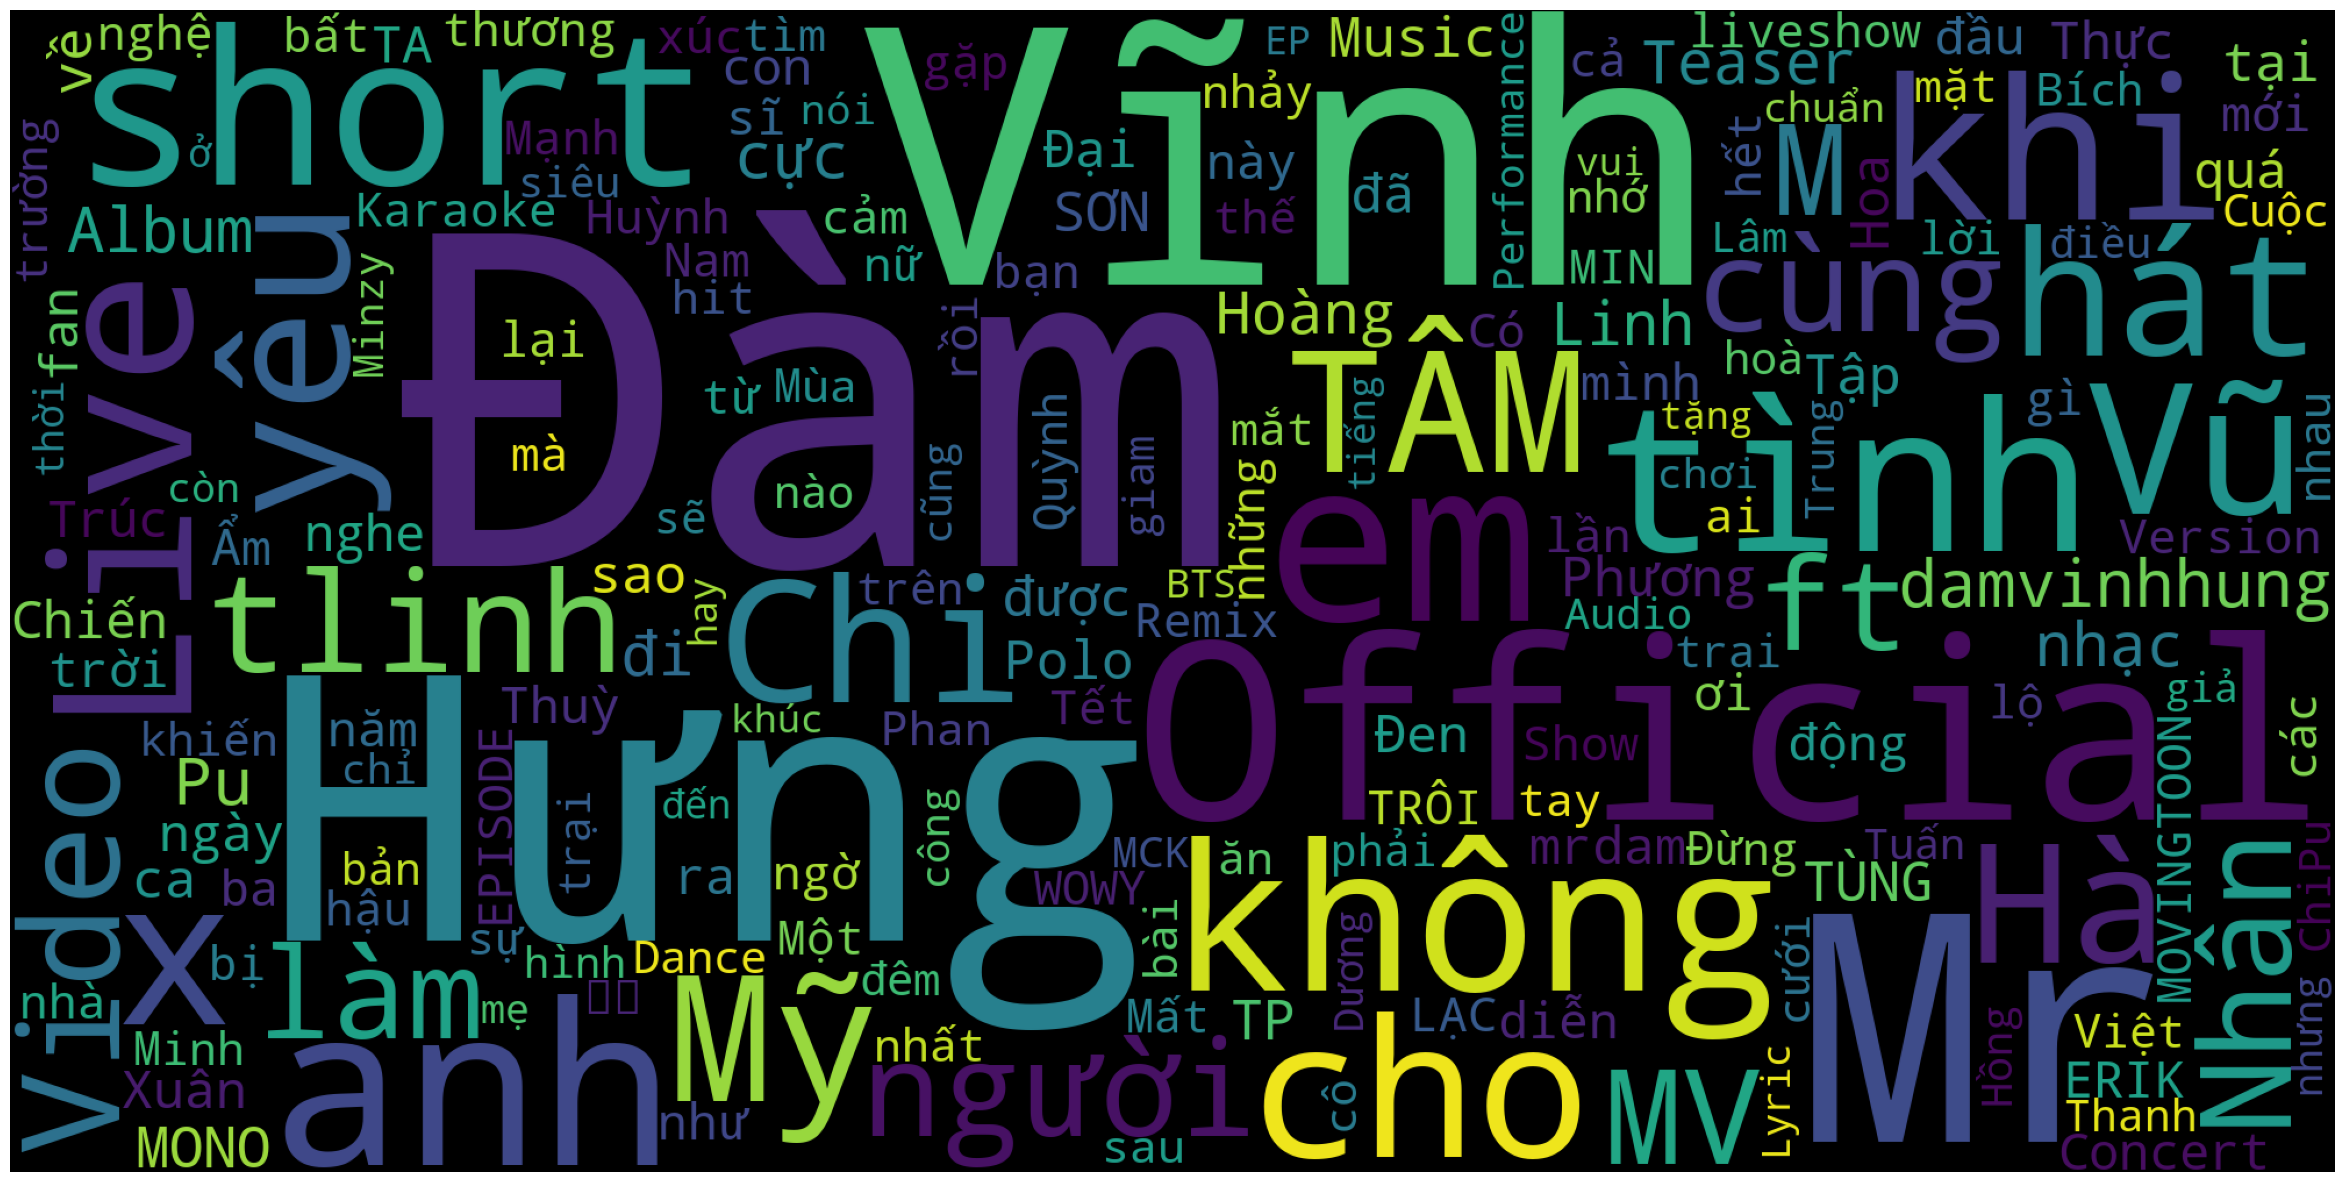

In [61]:
df_filtered = filter_df('2021-01-01','2024-12-31')

### Phân bố Số lượt xem trên từng video của từng kênh

In [65]:
fig = px.violin(df, x='Tên kênh', y='Số lượt xem', box=True, points="all", 
                labels={'Tên kênh': 'Tên kênh', 'Số lượt xem': 'Số lượt xem'},
                title='Phân bố Số lượt xem trên từng Video của từng Kênh')

fig.show()